# Simple Linear Regression - Icecream revenue prediction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
icecream_df = pd.read_csv('/Users/usripha/Desktop/DataScience/Simple Linear Regression/IceCreamData.csv')

In [6]:
icecream_df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [7]:
icecream_df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [9]:
#shows if there is missing data - Ex: non-null (no null values in column)
icecream_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
Temperature    500 non-null float64
Revenue        500 non-null float64
dtypes: float64(2)
memory usage: 7.9 KB


# Visualize Dataset

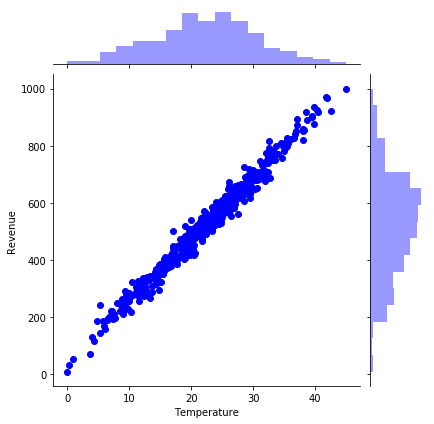

In [12]:
sns.jointplot(x='Temperature', y='Revenue', data = icecream_df, color='blue')

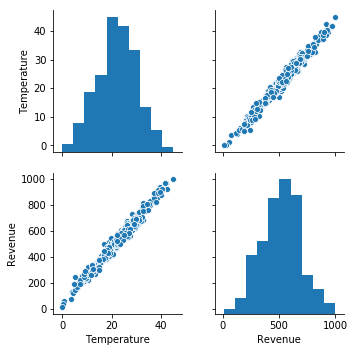

In [13]:
sns.pairplot(icecream_df)

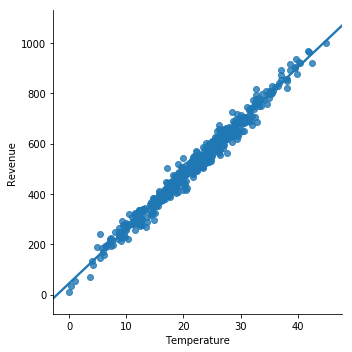

In [14]:
sns.lmplot(x='Temperature', y='Revenue', data=icecream_df)

# Create testing and training Dataset

In [15]:
#independent variable
X = icecream_df[['Temperature']]

In [16]:
y = icecream_df['Revenue']

In [17]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=42)

In [20]:
X_train

,Temperature
471,19.494743
26,15.661464
7,30.833985
453,31.160030
108,28.436567
37,17.517074
157,28.271765
489,26.964217
118,11.059097
114,17.690032


In [26]:
X_train.shape

(375, 1)

In [27]:
X_test.shape

(125, 1)

In [28]:
y_train.shape

(375,)

In [29]:
y_test.shape 

(125,)

# Train the model 

In [31]:
#fit_intercept=True - asking LinearRegressor to get slope of the line(otherwise assumed b=0)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept=True)
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
print('Linear Model Coefficient (m)', regressor.coef_)
print('Linear Model Coefficient (b)', regressor.intercept_)

Linear Model Coefficient (m) [21.37416109]
Linear Model Coefficient (b) 46.91078475053075


# Test the model

In [33]:
y_predict = regressor.predict(X_test)

In [35]:
y_predict.shape

(125,)

Text(0.5, 1.0, 'Revenue generated Vs. Temperature for Icecream')

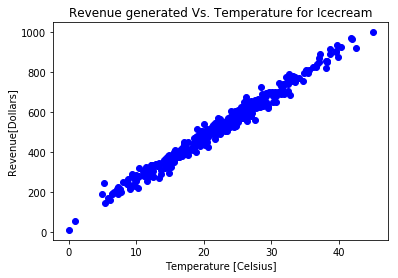

In [37]:
plt.scatter(X_train, y_train, color='blue')
plt.ylabel('Revenue[Dollars]')
plt.xlabel('Temperature [Celsius]')
plt.title('Revenue generated Vs. Temperature for Icecream')

Text(0.5, 1.0, 'Revenue generated Vs. Temperature for Icecream')

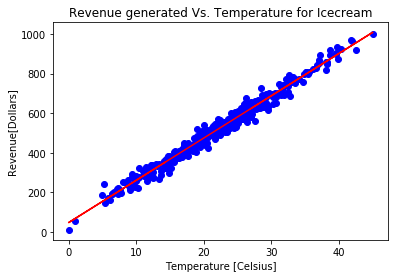

In [39]:
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, regressor.predict(X_train), color='red')
plt.ylabel('Revenue[Dollars]')
plt.xlabel('Temperature [Celsius]')
plt.title('Revenue generated Vs. Temperature for Icecream')

Text(0.5, 1.0, 'Revenue generated Vs. Temperature for Icecream')

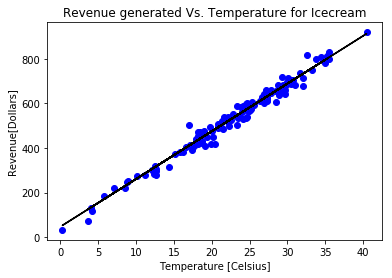

In [40]:
#Test set has 125 data points only so less dots
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, regressor.predict(X_test), color='black')
plt.ylabel('Revenue[Dollars]')
plt.xlabel('Temperature [Celsius]')
plt.title('Revenue generated Vs. Temperature for Icecream')

In [52]:
#How to use this model to predict value for ex: for Temp = 40
T = [[40]]
revenue = regressor.predict(T)

In [53]:
revenue

array([901.87722834])